# Домашнее задание №9

## Задание 1

Подготовить тестовое изображение в градациях серого.

In [1]:
import cv2
import numpy as np
import skimage
import skimage.io
from matplotlib import pyplot as plt

src_image_url = 'https://drive.google.com/u/0/uc?id=1jw1cCmlS-yPL3a9a4ktGjqlMh_MS3TF3&export=download'
src_image = skimage.io.imread(src_image_url)
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)

## Задание 2

Найти все контуры на изображении с помощью cv.findContours.

In [2]:
thresholded_image = cv2.threshold(gray_image, np.iinfo(np.uint8).min, np.iinfo(np.uint8).max, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresholded_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[0]

## Задание 3

Построить изображение всех контуров с помощью cv.drawContours.

In [3]:
contours_image = np.zeros(gray_image.shape)
cv2.drawContours(contours_image, contours, -1, (150, 150, 150), 1);

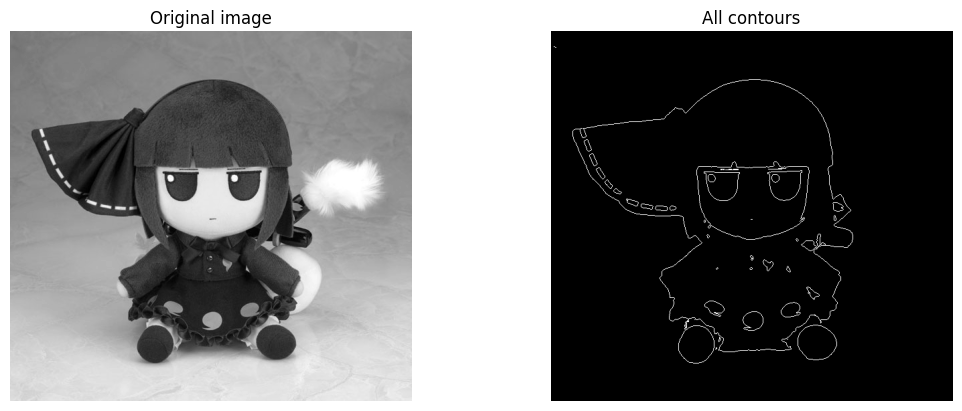

In [4]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(contours_image, cmap='gray')
plt.axis("off")
plt.title("All contours");

## Задание 4

Вывести количество точек в трёх самых больших контурах.

In [5]:
contours_with_length = [(cont, len(cont)) for cont in contours]
contours_with_length.sort(key=lambda pair: pair[1])
contours, num_of_points = map(list, zip(*contours_with_length))
print(num_of_points[-1], num_of_points[-2], num_of_points[-3])

1746 498 160


## Задание 5

На том же изображении построить выпуклую оболочку с помощью cv.convexHull для самого большого контура.

In [6]:
hull = cv2.convexHull(contours[-1])
contours_and_hull_image = contours_image.copy()
cv2.drawContours(contours_and_hull_image, [hull], -1, (255, 255, 255), 3);

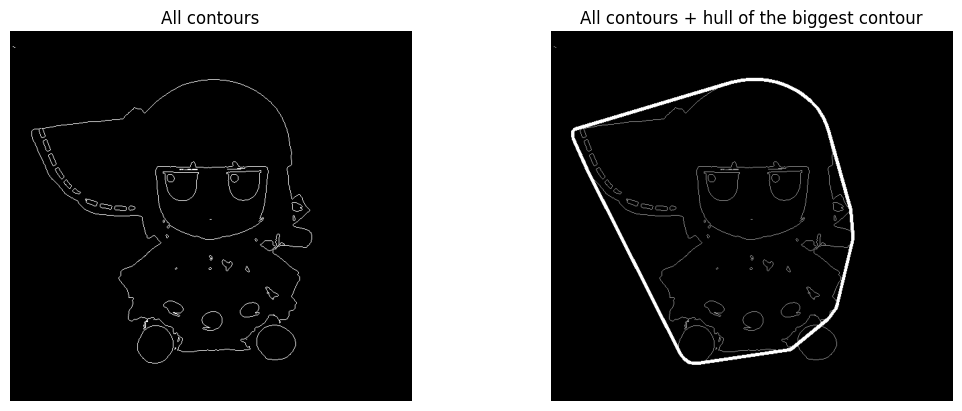

In [7]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(contours_image, cmap='gray')
plt.axis("off")
plt.title("All contours")

plt.subplot(1, 2, 2)
plt.imshow(contours_and_hull_image, cmap='gray')
plt.axis("off")
plt.title("All contours + hull of the biggest contour");

## Задание 6

Построить точки начала и конца каждого дефицита выпуклости (cv.convexityDefects).

In [8]:
defects = cv2.convexityDefects(contours[-1], cv2.convexHull(contours[-1], returnPoints = False))
contours_hull_defects_image = contours_and_hull_image.copy()

for i in range(defects.shape[0]):
    start_point = contours[-1][defects[i][0][0]][0]
    end_point = contours[-1][defects[i][0][1]][0]

    # маленький круг - начало дефицита
    cv2.circle(contours_hull_defects_image, start_point, 3, (255, 255, 255), 5)
    # большая окружность - конец дефицита
    cv2.circle(contours_hull_defects_image, end_point, 10, (255, 255, 255), 2)

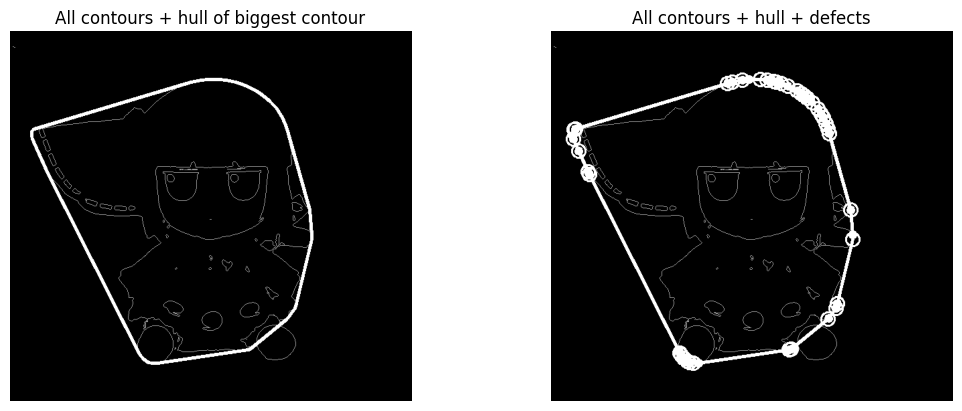

In [9]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(contours_and_hull_image, cmap='gray')
plt.axis("off")
plt.title("All contours + hull of biggest contour")

plt.subplot(1, 2, 2)
plt.imshow(contours_hull_defects_image, cmap='gray')
plt.axis("off")
plt.title("All contours + hull + defects");

## Задание 7

Повторить построение для каждого метода аппроксимации в cv.findContours.

In [10]:
def getting_contours_hull_defect(thresholded_image, method):
    contours = cv2.findContours(thresholded_image, cv2.RETR_LIST, method)[0]
    contours_with_length = [(cont, len(cont)) for cont in contours]
    contours_with_length.sort(key=lambda pair: pair[1])
    contours, num_of_points = map(list, zip(*contours_with_length))
    hull = cv2.convexHull(contours[-1])
    defects = cv2.convexityDefects(contours[-1], cv2.convexHull(contours[-1], returnPoints = False))
    
    contours_image = np.zeros(gray_image.shape)
    cv2.drawContours(contours_image, contours, -1, (150, 150, 150), 1);

    contours_and_hull_image = contours_image.copy()
    cv2.drawContours(contours_and_hull_image, [hull], -1, (255, 255, 255), 3);

    contours_hull_defects_image = contours_and_hull_image.copy()
    for i in range(defects.shape[0]):
        start_point = contours[-1][defects[i][0][0]][0]
        end_point = contours[-1][defects[i][0][1]][0]
    
        # маленький круг - начало дефицита
        cv2.circle(contours_hull_defects_image, start_point, 3, (255, 255, 255), 5)
        # большая окружность - конец дефицита
        cv2.circle(contours_hull_defects_image, end_point, 10, (255, 255, 255), 2)

    return [contours_image, contours_and_hull_image, contours_hull_defects_image]

methods = [cv2.CHAIN_APPROX_NONE, cv2.CHAIN_APPROX_SIMPLE, cv2.CHAIN_APPROX_TC89_L1, cv2.CHAIN_APPROX_TC89_KCOS]
method_names = ["no chain approx", "simple chain approx", "TC89_L1", "TC89_KCOS"]
stage_names = ["All contours", "All contours + hull", "All contours + hull + defects"]
images = [getting_contours_hull_defect(thresholded_image, method) for method in methods]

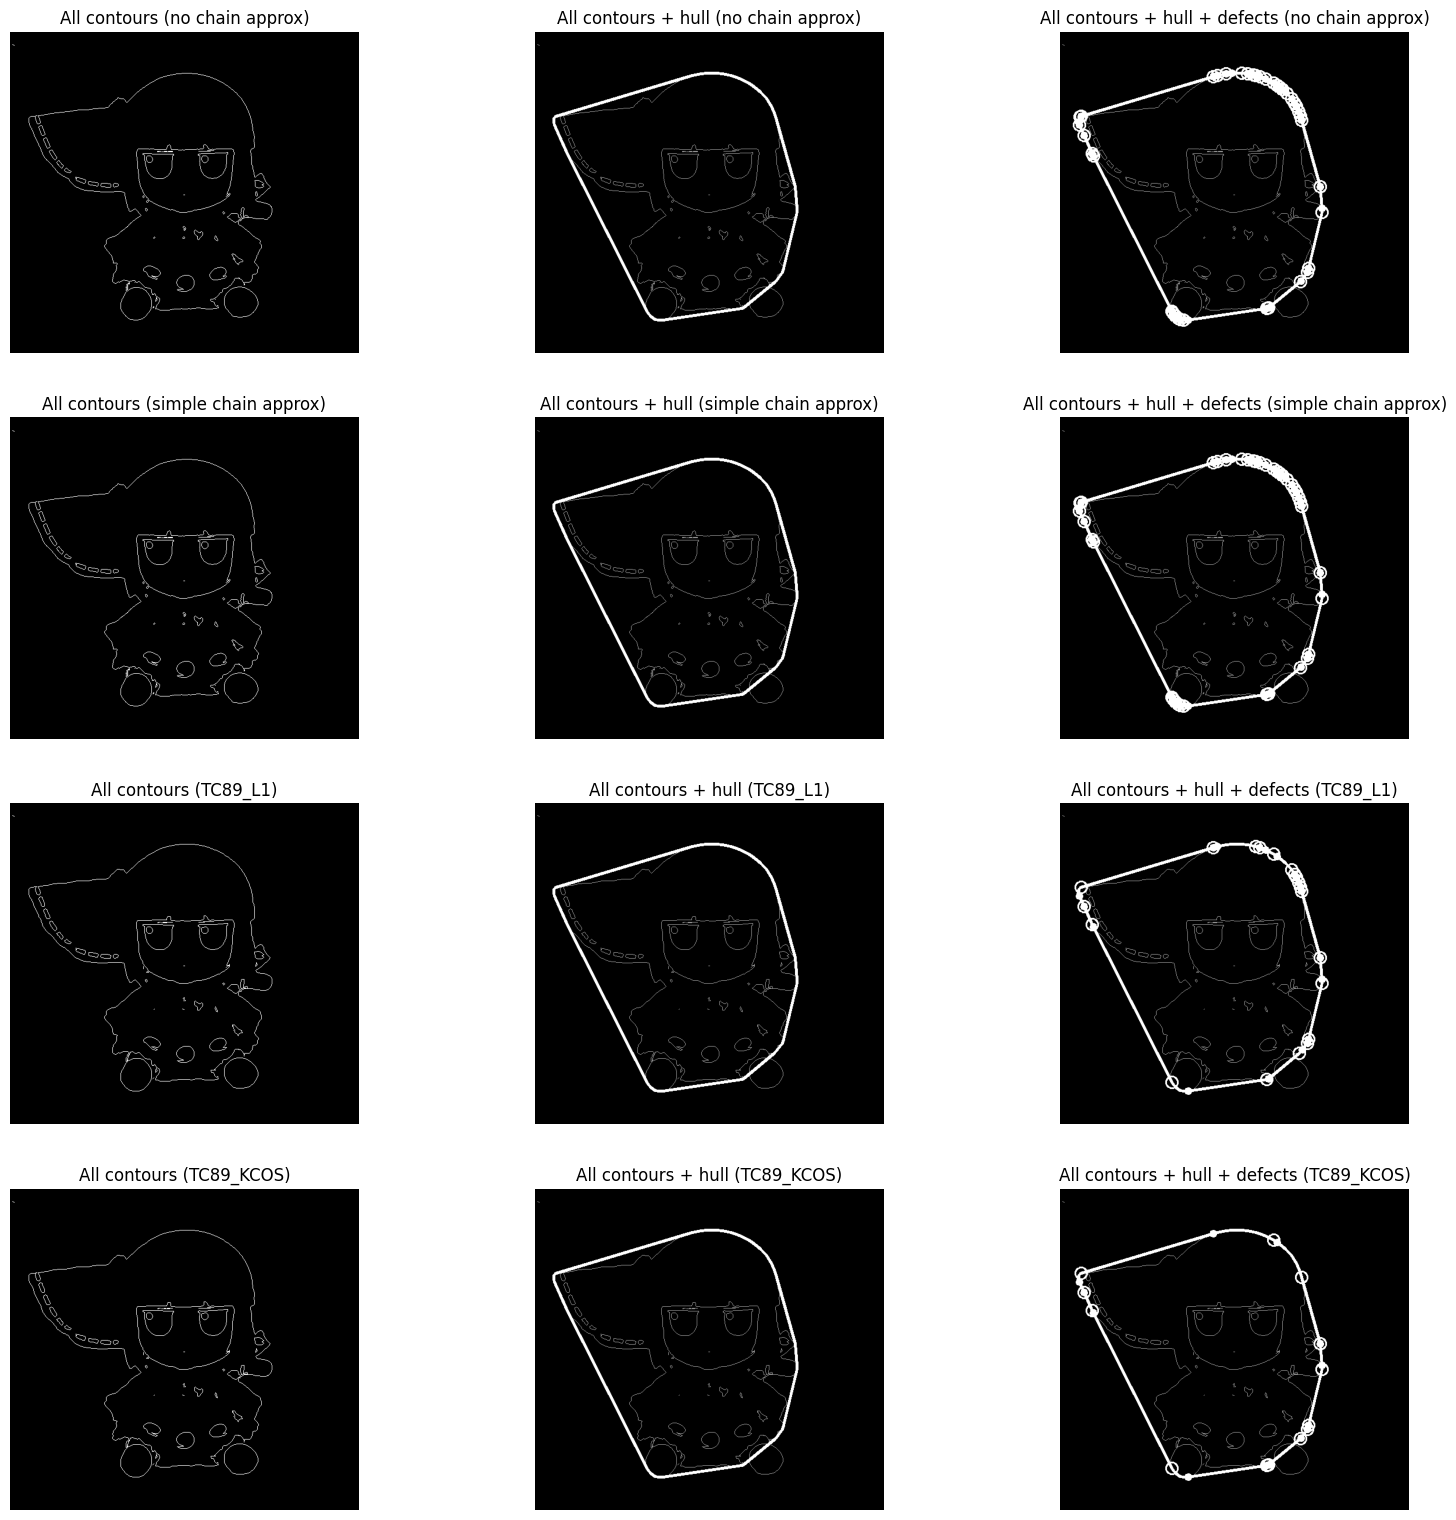

In [11]:
figure_cols = 3
figure_rows = len(methods)
plt.figure(figsize=[6.4 * figure_cols, 4.8 * figure_rows])

for i in np.arange(figure_rows):
    for j in np.arange(figure_cols):   
        plt.subplot(figure_rows, figure_cols, i * figure_cols + j + 1)
        plt.imshow(images[i][j], cmap='gray')
        plt.axis("off")
        plt.title(f"{stage_names[j]} ({method_names[i]})")

### Выполнил: Лежнин Максим Витальевич